In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# EPFL Machine Learning Higgs

This notebook presents our results for the EPFL Machine Learning Higgs Boson Challenge.
We first apply all mandatory implementations from the project to the challenge, on raw unaltered data.

In a second step, we use different techniques to better our prediction performance, namely on the Ridge Regression model that we choose as our baseline.

Finaly, the last section of the notebook allows us to compute our prediction on the test set.

## 1. Load the training data into feature matrix, class labels, and event ids:

In [50]:
from proj1_helpers import *
from implementations import least_squares, least_squares_GD, least_squares_SGD, ridge_regression, logistic_regression, reg_logistic_regression
from cross_validation import *
from plots import *

In [3]:
DATA_TRAIN_PATH = 'data/train.csv' 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [4]:
nb_features=tX.shape[1]

## 2. Classic ML methods without any data pre-processing

The following predictions are made using the functions implemented during the course labs. The results serve as a baseline to compare with our future results and see weather there is improvement. The selected parameter where also randomly chosen.
### 2.1 Least Squares GD

In [21]:
kwargs = {}
kwargs['max_iters'] = 10
kwargs['gamma'] = 0.1

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tX, compute_accuracy, 'least_squares_GD', k_fold=4, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.4182063027028858
Mean testing loss: 0.4169221489890197
Mean training accuracy: 0.6923906666666668
Mean testing accuracy: 0.692396


### 2.2 Least Squares SGD

In [22]:
kwargs = {}
kwargs['max_iters'] = 50
kwargs['gamma'] = 0.001

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tX, compute_accuracy, 'least_squares_SGD', k_fold=4, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.4773664334545206
Mean testing loss: 0.47676613351706765
Mean training accuracy: 0.6456706666666666
Mean testing accuracy: 0.645228


### 2.3 Least Squares, normal equations

In [23]:
loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tX, compute_accuracy, 'least_squares', k_fold=4)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.3889363604714363
Mean testing loss: 0.3890671452268004
Mean training accuracy: 0.718468
Mean testing accuracy: 0.7184320000000001


### 2.4 Ridge Regression

In [24]:
kwargs = {}
kwargs['lambda_'] = 0.01

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tX, compute_accuracy, 'ridge_regression', k_fold=4, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.39024101286443846
Mean testing loss: 0.3903157766456746
Mean training accuracy: 0.71638
Mean testing accuracy: 0.716272


### 2.5 Logistic Regression

In [25]:
kwargs = {}
kwargs['max_iters'] = 100
kwargs['gamma'] = 0.00001

# We modify the labels taking into account the fact that logistic regression returns 0 instead of -1
y_log_reg = (y+1)/2

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y_log_reg, tX, compute_accuracy_log_reg, 'logistic_regression', k_fold=4, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 234959.56653122348
Mean testing loss: 0.9902666664419358
Mean training accuracy: 0.5839799999999999
Mean testing accuracy: 0.584004


### 2.6 Penalized Logistic Regression

In [26]:
kwargs = {}
kwargs['max_iters'] = 1000
kwargs['gamma'] = 0.00001
kwargs['lambda_'] = 0.0001

# We modify the labels taking into account the fact that logistic regression returns 0 instead of -1
y_log_reg = (y+1)/2

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y_log_reg, tX, compute_accuracy_log_reg, 'reg_logistic_regression', k_fold=4, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 206552.33215697762
Mean testing loss: 0.9631777532401782
Mean training accuracy: 0.5972013333333334
Mean testing accuracy: 0.5970960000000001


## 3. Improving the baseline model

We now try to perform different techniques to improve our prediction using ridge regression, and stack them along this notebook.

In [47]:
### TODO delete when not required anymore
sub_idx = np.random.permutation(250000)[:1000]

# sub sample to work on time consuming methods
sub_tx = tx[sub_idx]
sub_y = y[sub_idx]

We recall that the raw model performance was 71.62% in terms of mean test accuracy.

#### 3.1 Adding an offset term

We start off by adding an offset term to our regression, thus making our problem D = 31 dimensional.

In [29]:
kwargs = {}
kwargs['lambda_'] = 0.01

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tX, compute_accuracy, 'ridge_regression', k_fold=4, add_offset=True, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.3407519666578689
Mean testing loss: 0.3408357518076855
Mean training accuracy: 0.7433799999999999
Mean testing accuracy: 0.74344


 Adding an offset term proves to be succesful operation, improving our performance by roughly 2.68 percentage points.

#### 3.2 Polynomial extension

As a second technique, we decide to conduct a polynomial extension of our features. We take the square of each of our original features, thus leading to D = 61 dimension space.

In [32]:
kwargs = {}
kwargs['lambda_'] = 0.01

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tX, compute_accuracy, 'ridge_regression', k_fold=4, degree=2, add_offset=True, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.3258366636264841
Mean testing loss: 0.37581755938543204
Mean training accuracy: 0.7611426666666666
Mean testing accuracy: 0.76084


Once again, the performance increases, by roughly 1.7 percentage points

#### 3.3 Hyper-parameter search

Our model now has two different hyper-parameter: the degree of the polynomial extension, and the regularisation parameter lambda. We conduct a double hyper-parameter grid search, and select the best performing pair in terms of mean testing accuracy over all testing folds.

Best degree: 10
Best lambda: 1.389495494373136e-10


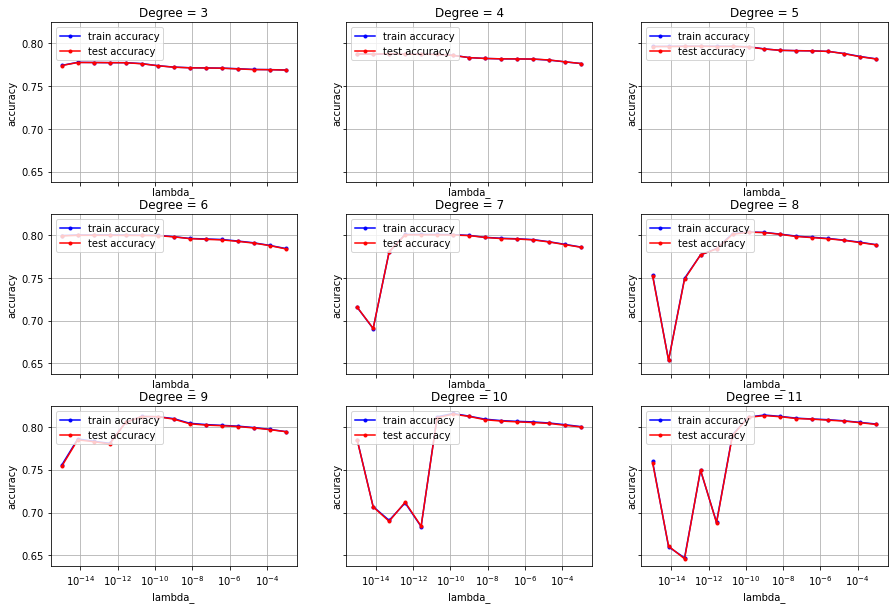

In [52]:
max_degree = 11
degree_space = range(3, max_degree + 1)
lambda_space = np.logspace(-15, -3, 15)
best_degree, best_lambda = cross_validation_degree_and_param_search(y, tX, param_name='lambda_',
                                                                    degree_space=degree_space,
                                                                    param_space=lambda_space,
                                                                    metric=compute_accuracy,
                                                                    learning_model='ridge_regression',
                                                                    add_offset=True,
                                                                    k_fold=4)
print('Best degree: {}'.format(best_degree))
print('Best lambda: {}'.format(best_lambda))

In [53]:
kwargs = {}
kwargs['lambda_'] = best_lambda

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tX, compute_accuracy, 'ridge_regression', k_fold=4, degree=best_degree, add_offset=True, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.27447901136630004
Mean testing loss: 1.0172235703210662e+20
Mean training accuracy: 0.8166053333333334
Mean testing accuracy: 0.816104


The returned pair is degree = 10 and lambda roughly equal to 1.38e-10. Using these values we indeed obtain a better performance, now reaching 81.61% accuracy, which is roughly a 5.5 percentage point increase.
We also notice that paradoxaly, the testing loss has exploded. Nonetheless, this kind of behavior can happen when using MSE which is the case here in the ridge regression.

### Data preprocessing

Looking at the data we observe that ???? 

In [54]:
tx = mass_abs(tX)

In [55]:
kwargs = {}
kwargs['lambda_'] = best_lambda

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tx, compute_accuracy, 'ridge_regression', k_fold=4, degree=best_degree, add_offset=True, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.27301771882919096
Mean testing loss: 8.054876265645895e+19
Mean training accuracy: 0.8169146666666667
Mean testing accuracy: 0.816608


In [97]:
tx_phi

array([[ 1.00000000e+00,  1.34700000e+01,  5.16550000e+01, ...,
         1.24000000e+00, -2.47500000e+00,  1.13497000e+02],
       [ 1.00000000e+00,  3.59370000e+01,  6.87680000e+01, ...,
        -9.99000000e+02, -9.99000000e+02,  4.62260000e+01],
       [ 1.00000000e+00,  4.94921398e+01,  1.62172000e+02, ...,
        -9.99000000e+02, -9.99000000e+02,  4.42510000e+01],
       ...,
       [ 1.00000000e+00,  1.95430000e+01,  6.05260000e+01, ...,
        -9.99000000e+02, -9.99000000e+02,  4.19920000e+01],
       [ 1.00000000e+00,  3.00490000e+01,  1.93620000e+01, ...,
        -9.99000000e+02, -9.99000000e+02,  0.00000000e+00],
       [ 1.00000000e+00,  1.12400000e+03,  7.27560000e+01, ...,
        -9.99000000e+02, -9.99000000e+02,  0.00000000e+00]])

In [89]:
stan_tX, _, _ = standardise(tx)
eigen_values, eigen_vectors = np.linalg.eig(np.cov(stan_tX.T))

# Calculating the explained variance on each of components
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

[40.88936287627325, 7.9220685930127015, 7.872531862147633, 6.290677515091544, 5.475203017613468, 5.183761834321638, 3.920428711152875, 4.023875076567922, 3.355728023978446, 3.0176614838007136, 2.6179228632969562, 2.2058765973787455, 1.614107295895485, 1.3394620796224803, 1.4759246992911161, 0.9703594368738941, 0.4869350119258079, 0.3945199889923991, 0.20704944812730855, 0.31517522685561367, 0.2996037566998952, 0.11880208987769707, 0.002426247967194658, 0.00046010463652533957, 2.6022439980320673e-05, 2.282672740311337e-05, 1.6362953063851323e-05, 1.0010917050984859e-05, 9.355195857135497e-07, 4.161944427678628e-11]


In [90]:
variance_explained

[40.88936287627325,
 7.9220685930127015,
 7.872531862147633,
 6.290677515091544,
 5.475203017613468,
 5.183761834321638,
 3.920428711152875,
 4.023875076567922,
 3.355728023978446,
 3.0176614838007136,
 2.6179228632969562,
 2.2058765973787455,
 1.614107295895485,
 1.3394620796224803,
 1.4759246992911161,
 0.9703594368738941,
 0.4869350119258079,
 0.3945199889923991,
 0.20704944812730855,
 0.31517522685561367,
 0.2996037566998952,
 0.11880208987769707,
 0.002426247967194658,
 0.00046010463652533957,
 2.6022439980320673e-05,
 2.282672740311337e-05,
 1.6362953063851323e-05,
 1.0010917050984859e-05,
 9.355195857135497e-07,
 4.161944427678628e-11]

Text(0.5, 1.0, 'Explained variance vs Number of components')

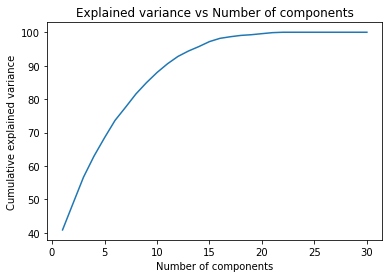

In [91]:
# Identifying components that explain at least 95%
cumulative_variance_explained = np.cumsum(variance_explained)

# Visualizing the eigenvalues and finding the "elbow" in the graphic
sns.lineplot(x = [i+1 for i in range(30)], y=cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")

In [92]:
projection_matrix = (eigen_vectors.T[:][:20]).T
# Getting the product of original standardized X and the eigenvectors 
tX_pca = stan_tX.dot(projection_matrix)
tX_pca

array([[ 3.82184037, -1.11580795, -1.66247266, ..., -0.06117227,
         0.03045851,  0.24684064],
       [-0.98876299, -0.40338897,  1.75524591, ...,  0.13465072,
         0.18388308,  0.16660242],
       [-0.47370223,  4.51729734,  0.47677636, ..., -0.15876378,
        -0.28654566,  0.65096854],
       ...,
       [-0.88682813, -0.23909028,  1.69505526, ..., -0.04683935,
         0.0686812 ,  0.09917478],
       [-3.07915695, -1.67341419, -0.03171262, ...,  0.06367414,
         0.14795286,  0.11646187],
       [-3.30836546,  0.53896289, -1.05908229, ...,  0.14830973,
         0.0998994 ,  0.16296513]])

In [99]:
kwargs = {}
kwargs['lambda_'] = best_lambda

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, tX_pca, compute_accuracy, 'ridge_regression', k_fold=4, degree=8, add_offset=True, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.32132145787301447
Mean testing loss: 6883979025290.133
Mean training accuracy: 0.7661586666666667
Mean testing accuracy: 0.7656639999999999


Best degree: 10
Best lambda: 1.9306977288832455e-05


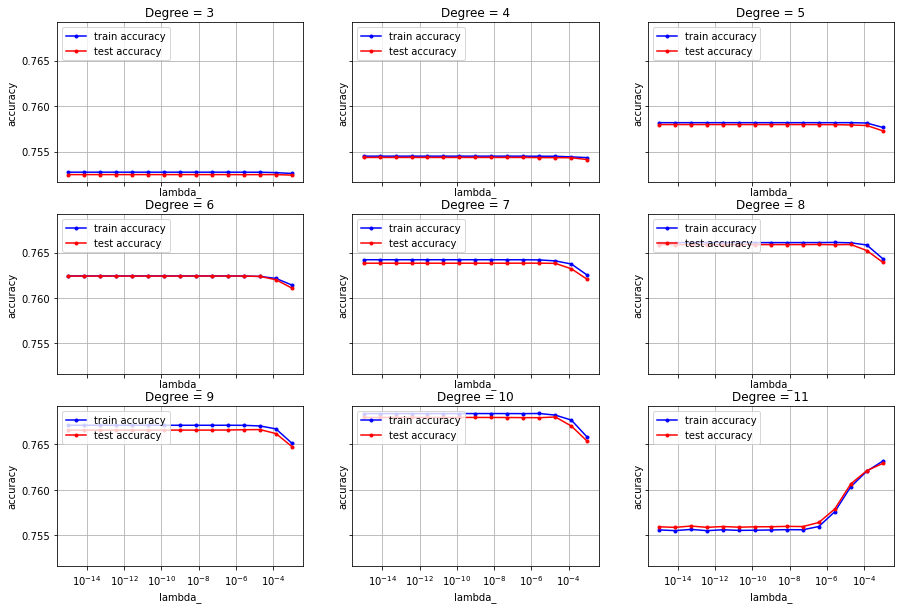

In [100]:
max_degree = 11
degree_space = range(3, max_degree + 1)
lambda_space = np.logspace(-15, -3, 15)
best_degree, best_lambda = cross_validation_degree_and_param_search(y, tX_pca, param_name='lambda_',
                                                                    degree_space=degree_space,
                                                                    param_space=lambda_space,
                                                                    metric=compute_accuracy,
                                                                    learning_model='ridge_regression',
                                                                    add_offset=True,
                                                                    k_fold=4)
print('Best degree: {}'.format(best_degree))
print('Best lambda: {}'.format(best_lambda))

In [96]:
kwargs = {}
kwargs['lambda_'] = best_lambda

loss_tr, loss_te, acc_tr, acc_te = cross_validation(y, stan_tX, compute_accuracy, 'ridge_regression', k_fold=4, degree=best_degree, add_offset=True, **kwargs)
display_cv_results(loss_tr, loss_te, acc_tr, acc_te)

Mean training loss: 0.2726104117835864
Mean testing loss: 5.049157711020644e+21
Mean training accuracy: 0.8161080000000001
Mean testing accuracy: 0.815876


## Generate predictions and save ouput in csv format for submission:

In [119]:
DATA_TEST_PATH = 'data/test.csv'

# TODO standardise test data when required
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [334]:
tx = mass_abs(tX)
tx, mean_tX, std_tX = standardise(tx)
tx = np.c_[np.ones(len(tx[:,0])), tx]
tx = build_poly(tx, degree=6)

w, loss = least_squares(y, tx)
compute_accuracy(w, y, tx)

0.807824

In [336]:
compute_loss_regression(w, y, tx)

4.649074522881124e+22

In [222]:
tx_test = mass_abs(tX_test)
tx_test, _, _ = standardise(tx_test, mean_tX, std_tX)
tx_test_poly = np.c_[np.ones(len(tx_test[:,0])), tx_test]
tx_test_poly = build_poly(tx_test_poly, 6)

print(tx_test_poly.shape)

(568238, 181)


In [223]:
w.shape

(181,)

In [224]:
OUTPUT_PATH = 'data/output.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(w, tx_test_poly)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [225]:
(y_pred == 1).sum()

174001

In [164]:
np.mean(tx_test, axis=1)

array([-0.63102913, -0.15065374, -0.45099874, ..., -0.51406582,
       -0.30788485, -0.35025265])